In [390]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import random

In [391]:
def get_column(data, index):    
    data = np.array(data)
    result = data[:, index].tolist()
    
    return result


def prepare_data(file_name_dataset):
    data = np.genfromtxt(
        file_name_dataset, 
        delimiter=",",
        skip_header=1
    ).tolist()
    N = len(data)
    
    # get TV (index = 0)
    tv_data = get_column(data, 0)
    
    # get radio (index = 1)
    radio_data = get_column(data, 1)
    
    # get newspaper (index = 2)
    newspaper_data = get_column(data, 2)
    
    # get sales (index = 3)
    sales_data = get_column(data, 3)
    
    # build X, y for training
    X = [tv_data, radio_data, newspaper_data]
    y = sales_data
    
    return X, y

In [392]:
X, y = prepare_data("Module_4\\Week_1\\advertising.csv")
list = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]

# Cau 1: A
print(list)  

[624.1, 175.10000000000002, 300.5, 78.9]


In [393]:
def implement_linear_regression(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []
    w1, w2, w3, b = initialize_params()
    N = len(y_data)
    
    for epoch in range(epoch_max):
        for i in range(N):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]
            
            # compute y_hat
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)
            
            # compute loss
            loss = compute_loss_mse(y_hat, y)
            # loss = compute_loss_mae(y_hat, y)
            
            # compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)
            
            # update parameters
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_b(b, dl_db, lr)
            
            # logging
            losses.append(loss)
    
    return (w1, w2, w3, b, losses)

In [394]:
def initialize_params():
    # should do this
    # w1 = random.gauss(mu=0.0, sigma=0.01)
    # w2 = random.gauss(mu=0.0, sigma=0.01)
    # w3 = random.gauss(mu=0.0, sigma=0.01)
    # b = 0
    
    # this is for homework
    w1, w2, w3, b = (
        0.016992259082509283, 
        0.0070783670518262355, 
        -0.002307860847821344, 
        0
    )
    
    return w1, w2, w3, b

In [395]:
def predict(x1, x2, x3, w1, w2, w3, b):
    result = w1 * x1 + w2 * x2 + w3 * x3 + b
    
    return result

In [396]:
# Cau 2: A
test_predict = predict(x1=1, x2=1, x3=1, w1=0, w2=0.5, w3=0, b=0.5)
print(test_predict)  

1.0


In [397]:
def compute_loss_mse(y_hat, y):
    loss = (y_hat - y) ** 2
    
    return loss

In [398]:
# Cau 3: A
test_loss_mse = compute_loss_mse(y_hat=1, y=0.5)
print(test_loss_mse)  

0.25


In [399]:
def compute_gradient_wi(xi, y, y_hat):
    dl_dwi = 2 * (y_hat - y) * xi
    
    return dl_dwi


def compute_gradient_b(y, y_hat):
    dl_db = 2 * (y_hat - y)
    
    return dl_db

In [400]:
# Cau 4: A
test_gradient_wi = compute_gradient_wi(xi=1.0, y=1.0, y_hat=0.5)
print(test_gradient_wi)  

-1.0


In [401]:
# Cau 5: B
test_gradient_b = compute_gradient_b(y=2.0, y_hat=0.5)
print(test_gradient_b)  

-3.0


In [402]:
def update_weight_wi(wi, dl_dwi, lr):
    wi = wi - lr * dl_dwi
    
    return wi


def update_weight_b(b, dl_db, lr):
    b = b - lr * dl_db
    
    return b

In [403]:
# Cau 6: A
test_update_weight_wi = update_weight_wi(wi=1.0, dl_dwi=-0.5, lr=1e-5)
print(test_update_weight_wi)  

1.000005


In [404]:
 # Cau 7: A
test_update_weight_b = update_weight_b(b=0.5, dl_db=-1.0, lr=1e-5)
print(test_update_weight_b) 

0.50001


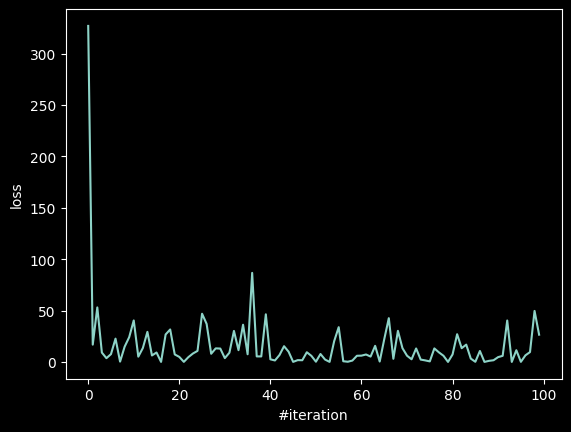

In [405]:
(w1, w2, w3, b, losses) = implement_linear_regression(X, y)

fig = plt.figure()
plt.plot(losses[:100])
plt.xlabel("#iteration")
plt.ylabel("loss")
plt.show()

In [406]:
# Cau 8: A
print(w1, w2, w3)

0.07405984066396477 0.15917360263437663 0.017561197559948935


In [407]:
# Cau 9: B
# given new data
tv = 19.2
radio = 35.9
newspaper = 51.3

sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f"Predicted sales is {sales}")

Predicted sales is 8.176413319549823


In [408]:
def compute_loss_mae(y_hat, y):
    loss = np.abs(y_hat - y)
    
    return loss

In [409]:
# Cau 10: A
test_loss_mae = compute_loss_mae(y_hat=1, y=0.5)
print(test_loss_mae)

0.5


In [410]:
def implement_linear_regression_nsamples(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []
    w1, w2, w3, b = initialize_params()
    N = len(y_data)
    
    for epoch in range(epoch_max):
        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0
        
        for i in range(N):
            # get a sample 
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]
            
            # compute y_hat
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)
            
            # compute loss
            loss = compute_loss_mse(y_hat, y)
            # loss = compute_loss_mae(y_hat, y)
            
            # acumulate loss
            loss_total += loss
            
            # compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)
            
            # accumulate gradients
            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db            
            
        # update parameters
        w1 = update_weight_wi_nsamples(w1, dw1_total, lr, N)
        w2 = update_weight_wi_nsamples(w2, dw2_total, lr, N)
        w3 = update_weight_wi_nsamples(w3, dw3_total, lr, N)
        b = update_weight_b_nsamples(b, db_total, lr, N)
        
        # logging
        losses.append(loss_total / N)
        
    return (w1, w2, w3, b, losses)

In [411]:
def update_weight_wi_nsamples(wi, dwi_total, lr, N):
    wi = wi - lr * dwi_total / N
    
    return wi


def update_weight_b_nsamples(b, db_total, lr, N):
    b = b - lr * db_total / N
    
    return b

[172.98395547828923, 39.4081674745134, 18.15746728564735, 14.634633779162357, 13.913880074022757, 13.640049637323427, 13.441395294810789, 13.259118517018994, 13.083802587178743, 12.913826664416215, 12.748804182322559, 12.58854742072041, 12.432904005847659, 12.281730988201284, 12.134890631437667, 11.992249630675893, 11.853678875589457, 11.719053303032835, 11.588251767260099, 11.461156916275085, 11.33765507239911, 11.217636116651946, 11.100993376782949, 10.987623518830578, 10.877426442098113, 10.77030517743778, 10.666165788738784, 10.564917277518695, 10.466471490519933, 10.370743030217112, 10.277649168143096, 10.187109760945374, 10.099047169086274, 10.013386178104167, 9.930053922354574, 9.848979811153313, 9.770095457245784, 9.693334607529332, 9.618633075957472, 9.545928678557278, 9.475161170493593, 9.406272185115144, 9.339205174920476, 9.273905354383018, 9.210319644576826, 9.148396619546123, 9.088086454363875, 9.029340874825948, 8.97211310872959, 8.916357838686066, 8.86203115641928, 8.80

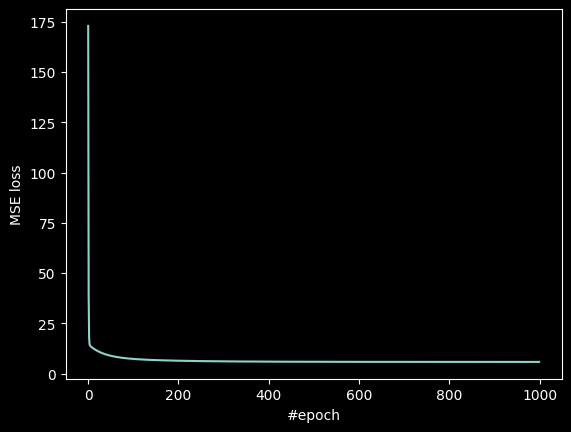

In [412]:
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(
    X, y,
    epoch_max=1000,
    lr=1e-5
)
print(losses)

plt.plot(losses)
plt.xlabel("#epoch")
plt.ylabel("MSE loss")
plt.show()

In [413]:
# Cau 11: D
print(w1, w2, w3)

0.06710990754044266 0.15756173831487585 0.029619799386084403


In [414]:
def prepare_data_new(file_name_dataset):
    data = np.genfromtxt(
        file_name_dataset, 
        delimiter=",",
        skip_header=1
    ).tolist()
    N = len(data)
    
    # get TV (index = 0)
    tv_data = get_column(data, 0)
    
    # get radio (index = 1)
    radio_data = get_column(data, 1)
    
    # get newspaper (index = 2)
    newspaper_data = get_column(data, 2)
    
    # get sales (index = 3)
    sales_data = get_column(data, 3)
    
    # build X, y for training
    X = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
    y = sales_data
    
    return X, y

In [415]:
def initialize_params_new():
    # should do this
    b = 0
    w1 = random.gauss(mu=0.0, sigma=0.01)
    w2 = random.gauss(mu=0.0, sigma=0.01)
    w3 = random.gauss(mu=0.0, sigma=0.01)
    
    return [0, -0.01268850433497871, 0.004752496982185252, 0.0073796171538643845]    
    # return w1, w2, w3, b

In [416]:
def predict_new(X_features, weights):
    result = sum([x * w for x, w in zip(X_features, weights)])
    
    return result


def compute_gradient_w(X_features, y, y_hat):
    dl_dweights = [2 * (y_hat - y) * x for x in X_features]
    
    return dl_dweights


def update_weights(weights, dl_dweights, lr):
    weights = [w - lr * dl_dw for w, dl_dw in zip(weights, dl_dweights)]
    
    return weights

In [417]:
def implement_linear_regression_new(X_features, y_data, epoch_max=50, lr=1e-5):
    losses = []
    weights = initialize_params_new()
    N = len(y_data)
    
    for epoch in range(epoch_max):
        for i in range(N):
            # get a sample
            features_i = X_features[i]
            y = y_data[i]
            
            # compute y_hat
            y_hat = predict_new(features_i, weights)
            
            # compute loss
            loss = compute_loss_mse(y_hat, y)
            # loss = compute_loss_mae(y_hat, y)
            
            # compute gradient w1, w2, w3, b
            dl_dweights = compute_gradient_w(features_i, y, y_hat)
            
            # update parameters
            weights = update_weights(weights, dl_dweights, lr)
            
            # logging
            losses.append(loss)
    
    return weights, losses

31.339223408109948


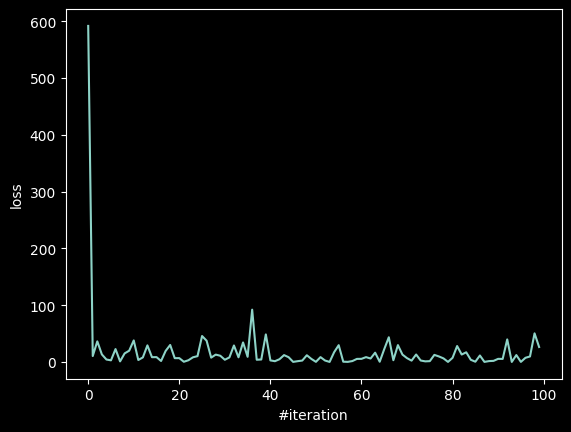

In [418]:
# Cau 12: A
X, y = prepare_data_new("Module_4\\Week_1\\advertising.csv")
W, L = implement_linear_regression_new(X, y, epoch_max=10000, lr=1e-5)

print(L[9999])

plt.plot(L[0:100])
plt.xlabel("#iteration")
plt.ylabel("loss")
plt.show()